In [1]:
!pip install gensim


In [2]:
import gensim

import gensim.downloader

Part 1: Word Embeddings

In [3]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['dog']

# Getting the most similar words

print(model.most_similar('dog'))

# Getting the similarity between two words

print(model.similarity('dog', 'cat'))


[==================================================] 100.0% 128.1/128.1MB downloaded
[('cat', 0.8798074126243591), ('dogs', 0.8344309329986572), ('pet', 0.7449564337730408), ('puppy', 0.7236376404762268), ('horse', 0.7109653949737549), ('animal', 0.6817063093185425), ('pig', 0.655417263507843), ('boy', 0.6545307636260986), ('cats', 0.6471933126449585), ('rabbit', 0.6468630433082581)]
0.87980753


Part 1a

In [5]:

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

pizza = model['pizza']

# Getting the most similar words

print(model.most_similar('pizza'))
#find the most similar words to a word of your choice. 
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group

[('sandwich', 0.7488480806350708), ('sandwiches', 0.7221847772598267), ('bread', 0.7006676197052002), ('pizzas', 0.7004502415657043), ('burger', 0.6977596282958984), ('snack', 0.6840100288391113), ('taco', 0.6788282990455627), ('pie', 0.677691638469696), ('chicken', 0.6714670658111572), ('burgers', 0.6690315008163452)]


### Found that result makes sense since pizza is most similar to sandwhich due to cosine similarity and charcteristics such as being made out bread.

In [6]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))



[('paris', 0.8827143311500549), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174600601196), ('berlin', 0.6665561199188232), ('brussels', 0.6574430465698242), ('lyon', 0.6526200771331787), ('london', 0.64079749584198), ('le', 0.6403627991676331), ('strasbourg', 0.6346526145935059)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.45332765579223633), ('non-arabs', 0.45208773016929626), ('amerindians', 0.4478238821029663), ('buffalos', 0.4475123882293701), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.4440663158893585), ('dingos', 0.44403281807899475)]
[('dogs', 0.8921768665313721), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512702345848083), ('pets', 0.7392118573188782), ('cows', 0.6835324168205261), ('pet', 0.679297685623169), ('horses', 0.6774964332580566), ('pigs', 0.6755765080451965), ('animal', 0.6683686971664429)]


In [7]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)



[('menstruating', 0.6102039813995361), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693746566772), ('uterus', 0.5093088746070862), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483376502991), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.42151397466659546), ('nistelrooy', 0.41140034794807434), ('strachan', 0.4089668393135071), ('rafa', 0.40728434920310974), ('technicals', 0.4060872495174408), ('allardyce', 0.4018688201904297), ('boss', 0.40107354521751404), ('rangers', 0.39962300658226013), ('utd', 0.3967454135417938)]


[('doctor', 0.8661209940910339),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089030742645264),
 ('doctors', 0.6793617010116577),
 ('pregnant', 0.6787967085838318),
 ('patient', 0.6772218346595764),
 ('dentist', 0.6694242358207703),
 ('mother', 0.6586815714836121),
 ('medical', 0.6466937065124512)]

Part 1b

In [8]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 
#does this show any bias or assumptions in the data? 
# Discuss with your group and share most interesting dimension in the document

import gensim.downloader as api

# Load model
model = api.load("glove-wiki-gigaword-100")

# Define different bias dimensions
emotion_vector = model["happy"] - model["sad"]
wealth_vector = model["rich"] - model["poor"]
career_vector = model["career"] - model["family"]
education_vector = model["educated"] - model["uneducated"]

# Find words most similar to these vectors
print("Words associated with 'happiness':")
print(model.most_similar(emotion_vector))

print("\nWords associated with 'wealth':")
print(model.most_similar(wealth_vector))

Words associated with 'happiness':
[('mates', 0.44262704253196716), ('compete', 0.42792338132858276), ('pack', 0.41732409596443176), ('horses', 0.4163558781147003), ('successfully', 0.4154323637485504), ('free', 0.41471919417381287), ('buyers', 0.41146576404571533), ('choose', 0.40914496779441833), ('keep', 0.4059116244316101), ('select', 0.4052850902080536)]

Words associated with 'wealth':
[('rich', 0.47552290558815), ('shaba', 0.44215652346611023), ('kenah', 0.42297691106796265), ('microfossils', 0.41998782753944397), ('elhanan', 0.4035807251930237), ('azulay', 0.3999216556549072), ('sands', 0.39826053380966187), ('karlgaard', 0.3942815363407135), ('herb', 0.39184635877609253), ('flavors', 0.39089491963386536)]


### Found that happiness has association with social groups such as mastes and compete rather than words like joy and smile, showing bias innthe dataset. Meanwhile, found that wealth has words like shaba and kennah, showing cultural bias in dataset.

Part 2: Visualization and Embeddings in Space

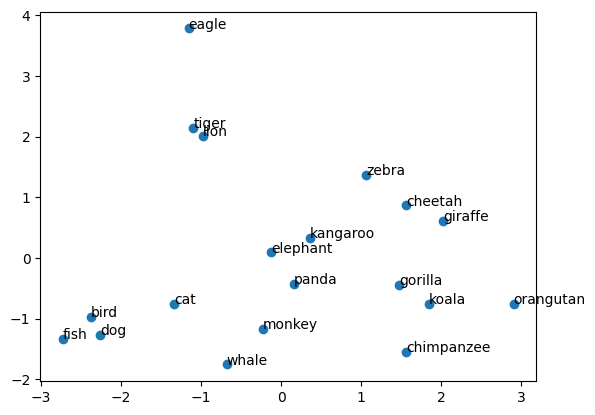

In [9]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

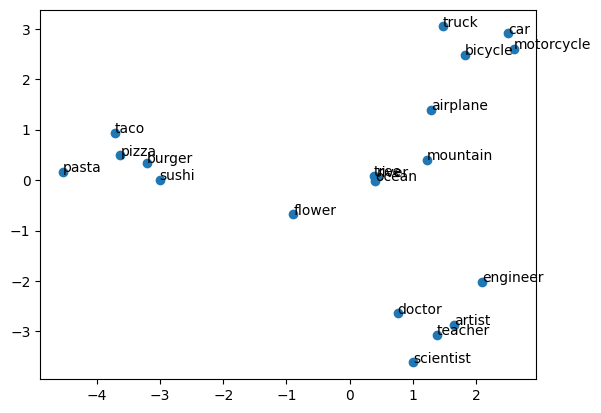

In [10]:
#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
words = [
    # Food
    "pizza", "burger", "pasta", "sushi", "taco",
    
    # Vehicles
    "car", "truck", "motorcycle", "bicycle", "airplane",

    # Nature
    "tree", "flower", "mountain", "river", "ocean",

    # Professions
    "doctor", "engineer", "teacher", "artist", "scientist"
]


X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()



In [11]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the Word2Vec model trained on Google News
word2vec_model = api.load("word2vec-google-news-300")


[==================================================] 100.0% 1662.8/1662.8MB downloaded


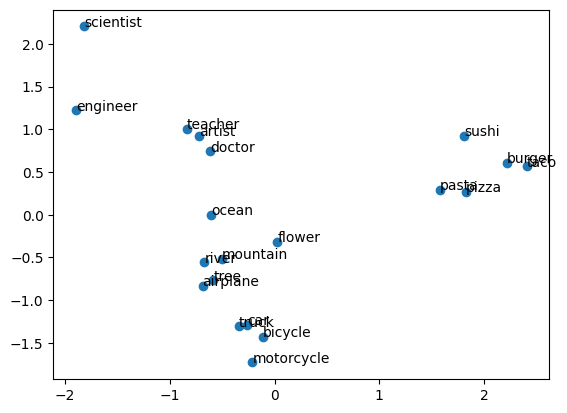

In [13]:
words = [
    # Food
    "pizza", "burger", "pasta", "sushi", "taco",
    
    # Vehicles
    "car", "truck", "motorcycle", "bicycle", "airplane",

    # Nature
    "tree", "flower", "mountain", "river", "ocean",

    # Professions
    "doctor", "engineer", "teacher", "artist", "scientist"
]


X=[word2vec_model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()


Found that words like scientist and engineer are defined more seperately compared to the previous dataset owing to the nature of Google News, reporting works seperately for the respective professions.

Part 3: Embedding reddit posts

In [17]:
#read in uiuc csv
import pandas as pd
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])




In [20]:
#using the code from project 1, clean the text and create a bag of words representation of the text
# Re-import necessary libraries since execution state was reset
import pandas as pd
import spacy
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Load the language model for lemmatization
nlp = spacy.load("en_core_web_sm")

# Define text cleaning and lemmatization functions
def clean(text):
    text = ' '.join(str(text).split())  # Remove newline and extra spaces
    text = text.lower()  # Convert to lowercase
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])  # Remove punctuation
    return text

def batch_lemmatize(texts, nlp):
    """ Process texts in batches using spaCy for efficiency """
    docs = list(nlp.pipe(texts, disable=["ner", "parser"]))  # Process in batches
    return [" ".join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct]) for doc in docs]

# Load UIUC and Michigan data (assuming CSV files are available in the environment)
uiuc = pd.read_csv("uiuc.csv")
umich = pd.read_csv("umich.csv")

# Assign labels to differentiate subreddits (1 for UIUC, 0 for Michigan)
uiuc['label'] = 1
umich['label'] = 0

# Combine datasets
data = pd.concat([uiuc, umich])

# Apply text cleaning
data['cleaned_text'] = data['text'].astype(str).apply(clean)

# Apply optimized batch lemmatization
data['lemmatized_text'] = batch_lemmatize(data['cleaned_text'], nlp)

# Create a bag of words representation with CountVectorizer
vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
X = vectorizer.fit_transform(data['lemmatized_text'])
y = data['label']

# Convert to a DataFrame for better readability
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
bow_df.head()


,aa,aapd,aata,ab,abandon,abhorrent,abide,ability,able,able afford,...,zionist,zionist day,zionist equal,zionist soldier,zionist transphobe,zip,zip car,zipcar,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/var/folders/b2/j7g2q50j3gdb2q8q1n6c5s7h0000gn/T/ipykernel_97600/2940978449.py:54: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(*scatter.legend_elements(), title="Subreddit", labels=["Michigan (0)", "UIUC (1)"])


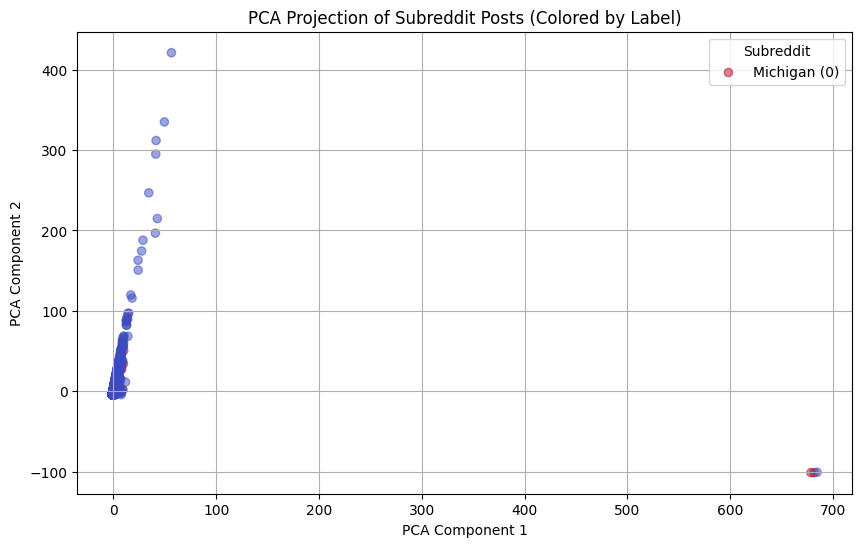

In [23]:
#using the embedding code from last week, plot a pca of all posts in the subreddits data set

#color by the "label" column to see if the two subreddits are separable in the embedding space

# is there a clear separation between the two columns? 


# Re-import necessary libraries since execution state was reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler

# Load UIUC and Michigan data (assuming CSV files are available in the environment)
uiuc = pd.read_csv("uiuc.csv")
umich = pd.read_csv("umich.csv")

# Assign labels to differentiate subreddits (1 for UIUC, 0 for Michigan)
uiuc['label'] = 1
umich['label'] = 0

# Combine datasets
data = pd.concat([uiuc, umich])

# Define text cleaning function
def clean(text):
    text = ' '.join(str(text).split())  # Remove newline and extra spaces
    text = text.lower()  # Convert to lowercase
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])  # Remove punctuation
    return text

# Apply text cleaning
data['cleaned_text'] = data['text'].astype(str).apply(clean)

# Convert text data into numerical embeddings using CountVectorizer
vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
X = vectorizer.fit_transform(data['cleaned_text'])

# Standardize the features
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X)

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled.toarray())

# Plot PCA results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['label'], cmap="coolwarm", alpha=0.5)

# Add legend
plt.legend(*scatter.legend_elements(), title="Subreddit", labels=["Michigan (0)", "UIUC (1)"])
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Projection of Subreddit Posts (Colored by Label)")
plt.grid()
plt.show()


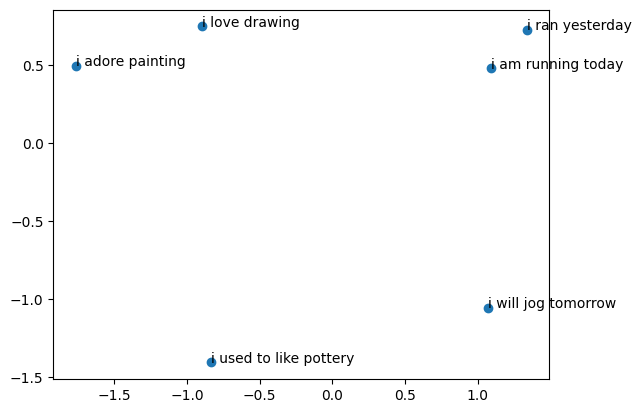

In [21]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#remove nan values
avg_embeddings=[embedding for embedding in avg_embeddings if not np.isnan(embedding).any()]
#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

/var/folders/b2/j7g2q50j3gdb2q8q1n6c5s7h0000gn/T/ipykernel_97600/1199197229.py:43: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(*scatter.legend_elements(), title="Subreddit", labels=["Michigan (0)", "UIUC (1)"])


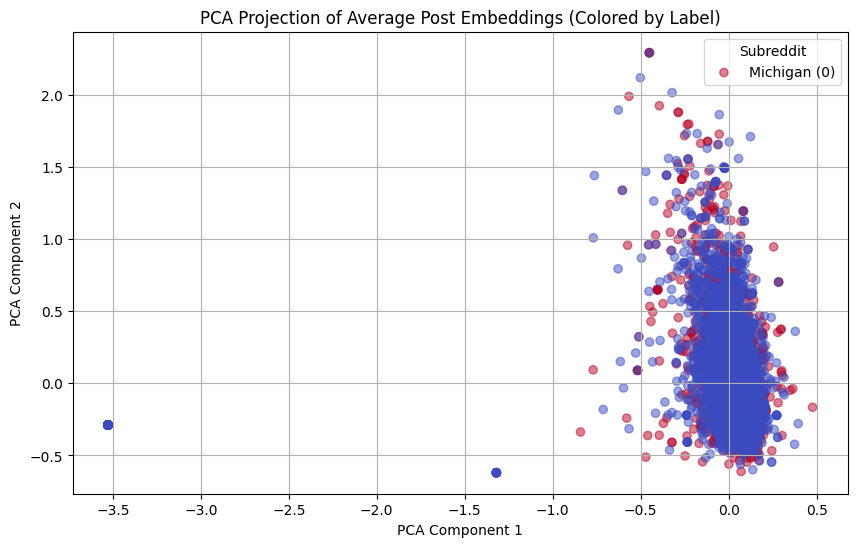

In [27]:

#use this function to calculate the average embedding of each post in the dataset

#plot the pca of the average embeddings, color by the "label" column

#how is this plot different from the previous one?

#is there clear separation? 

import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# Ensure text data has been processed
if 'cleaned_text' not in data.columns:
    raise ValueError("Cleaned text data is missing. Ensure text preprocessing is completed.")

# Define a function to calculate the average embedding for each post
def get_average_embedding(text, model):
    words = text.split()
    valid_vectors = [model[word] for word in words if word in model.key_to_index]
    if valid_vectors:
        return np.mean(valid_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)  # Return zero vector if no words found

# Load the Word2Vec model trained on Google News
word2vec_model = api.load("word2vec-google-news-300")

# Apply the function to get embeddings for each post
data["avg_embedding"] = data["cleaned_text"].apply(lambda x: get_average_embedding(x, word2vec_model))

# Convert list of embeddings into a NumPy array
embedding_matrix = np.vstack(data["avg_embedding"].values)

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(embedding_matrix)

# Plot PCA results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data["label"], cmap="coolwarm", alpha=0.5)

# Add legend
plt.legend(*scatter.legend_elements(), title="Subreddit", labels=["Michigan (0)", "UIUC (1)"])
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Projection of Average Post Embeddings (Colored by Label)")
plt.grid()
plt.show()


The new PCA plot uses word embeddings (through Word2Vec), capturing semantic meaning, unlike the previous Bag of Words method, which is based on word count.

Part 4: HuggingFace and BERT

In [1]:
!pip install transformers

In [1]:
#Please wait until after next week to start

# Use a pipeline as a high-level helper
from transformers import pipeline

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use mps:0


In [2]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this class")

[{'label': 'POS', 'score': 0.9923704862594604}]

In [ ]:
#use the pipeline to classify the sentiment of all posts in the reddit dataset
#report the most common sentiment label
# Re-import necessary libraries
from transformers import pipeline
import pandas as pd

# Load sentiment analysis model with truncation enabled to handle long text inputs
pipe = pipeline(
    "text-classification",
    model="finiteautomata/bertweet-base-sentiment-analysis",
    truncation=True,  # Truncate long text
    max_length=128  # Ensure text fits within the model's limit
)

# Load UIUC and Michigan subreddit data
uiuc = pd.read_csv("uiuc.csv")
umich = pd.read_csv("umich.csv")

# Combine datasets
data = pd.concat([uiuc, umich])

# Ensure text column exists and truncate long posts before processing
if 'text' in data.columns:
    data['truncated_text'] = data['text'].astype(str).apply(lambda x: x[:500])  # Limit to 500 characters
    data['sentiment'] = data['truncated_text'].apply(lambda x: pipe(x)[0]['label'])

    # Find the most common sentiment label
    most_common_sentiment = data['sentiment'].value_counts().idxmax()
  

# Output the most common sentiment label
most_common_sentiment


Device set to use mps:0


'NEU'

#### As we can see, the most common sentiment is Neutral.

In [9]:
#look at ten sample posts and labels; do you agree with all of them? 
sample_posts = data[['truncated_text', 'sentiment']].sample(n=10, random_state=42)
sample_posts

,truncated_text,sentiment
2760,No reason,NEU
534,Agreed. I,POS
3562,Sex concer,NEU
1240,If someone,NEU
5210,Bathrooms,NEU
4353,That's wil,NEU
1467,Lmao!,POS
2898,idk about,NEU
538,Is it that,NEU
5629,I had to g,NEU


#### I do agree with all of them. I believe the model did a good job in determining the sentiment, with words such as lmao given positive, sex concern given negative, and idk about given neutral.

In [12]:
#is the UIUC or Michigan subreddit more negative?

# Count the number of each sentiment label per subreddit
# Re-import necessary libraries
import pandas as pd
from transformers import pipeline

# Load sentiment analysis model
pipe = pipeline(
    "text-classification",
    model="finiteautomata/bertweet-base-sentiment-analysis",
    truncation=True,  # Ensure long posts are truncated
    max_length=128
)

# Load UIUC and Michigan subreddit data
uiuc = pd.read_csv("uiuc.csv")
umich = pd.read_csv("umich.csv")

# Ensure 'text' column exists
if 'text' not in uiuc.columns or 'text' not in umich.columns:
    raise ValueError("Text column missing in one of the datasets!")

# Add labels before merging (UIUC = 1, Michigan = 0)
uiuc["label"] = 1
umich["label"] = 0

# Combine datasets
data = pd.concat([uiuc, umich], ignore_index=True)

# Process sentiment only if 'text' column exists
data['truncated_text'] = data['text'].astype(str).apply(lambda x: x[:500])  # Truncate long posts
data['sentiment'] = data['truncated_text'].apply(lambda x: pipe(x)[0]['label'])

# Count the number of each sentiment label per subreddit
uiuc_sentiment_counts = data[data["label"] == 1]["sentiment"].value_counts()
umich_sentiment_counts = data[data["label"] == 0]["sentiment"].value_counts()

# Calculate the percentage of negative posts in each subreddit
uiuc_negative_pct = uiuc_sentiment_counts.get("NEG", 0) / uiuc_sentiment_counts.sum() * 100
umich_negative_pct = umich_sentiment_counts.get("NEG", 0) / umich_sentiment_counts.sum() * 100

# Determine which subreddit is more negative
more_negative_subreddit = "UIUC" if uiuc_negative_pct > umich_negative_pct else "Michigan"

# Display results
result = {
    "UIUC Negative Sentiment (%)": uiuc_negative_pct,
    "Michigan Negative Sentiment (%)": umich_negative_pct,
    "More Negative Subreddit": more_negative_subreddit
}

# Output the final result
result


Device set to use mps:0


{'UIUC Negative Sentiment (%)': 7.132275132275133,
 'Michigan Negative Sentiment (%)': 7.0032377982971585,
 'More Negative Subreddit': 'UIUC'}

#### Based on these numbers, UIUC subreddit is more negative than Umich.